In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import flopy
# %config InlineBackend.figure_format = 'svg'
config = {'font.family': 'Times New Roman',
          'font.size': 12,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'mathtext.fontset': 'stix',
         }
plt.rcParams.update(config)

results = np.load(f"./output/results.npy")
porosity = np.load(f"./output/results_porosity.npy")
K = np.load(f"./output/results_K.npy")

MIN3P_output = pd.read_csv("./input_data/MIN3P_output.csv")

sim = flopy.mf6.MFSimulation.load(sim_ws="./simulation/", sim_name="model", verbosity_level=0)
head = sim.get_model("gwf_model").output.head().get_alldata()

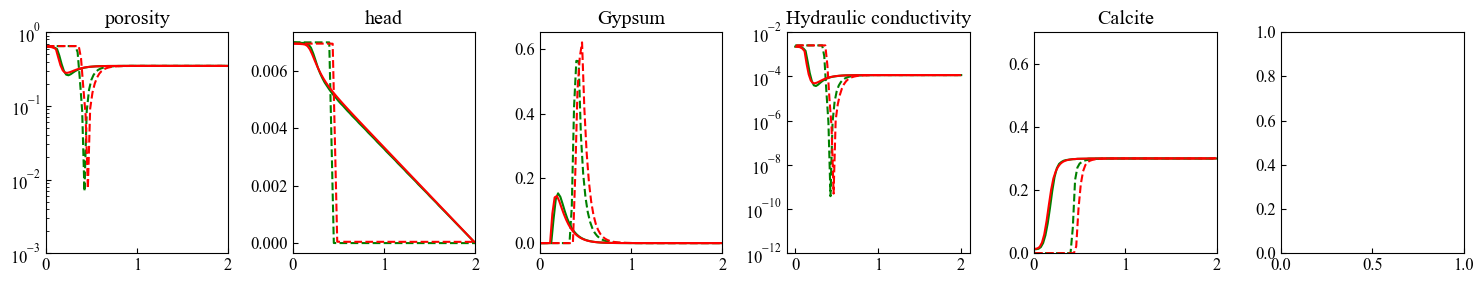

In [2]:
L = 2.0
dx = 0.025
n_mf6 = 80
n_min3p = 81

x_mf6 = np.linspace(dx/2, L - dx/2, n_mf6)
x_min3p = np.linspace(0, L, n_min3p)

fig, axes = plt.subplots(1, 6, figsize=(15, 3))

axes[0].plot(x_min3p, MIN3P_output["Porosity 10years"], c="green", linestyle='-')
axes[0].plot(x_min3p, MIN3P_output["Porosity 100years"], c="green", linestyle='--')
axes[0].plot(x_mf6, porosity[1000*10], c="red", linestyle='-')
axes[0].plot(x_mf6, porosity[1000*100], c="red", linestyle='--')
axes[0].set_yscale('log')
axes[0].set_xlim((0, 2))
axes[0].set_ylim((1e-3, 1.0))
axes[0].set_title("porosity")

axes[1].plot(x_min3p, MIN3P_output["Hydraulic head 10years"], c="green", linestyle='-')
axes[1].plot(x_min3p, MIN3P_output["Hydraulic head 100years"], c="green", linestyle='--')
axes[1].plot(x_mf6, head[1000*10-1, 0, 0, :], c="red", linestyle='-')
axes[1].plot(x_mf6, head[1000*100-1, 0, 0, :], c="red", linestyle='--')
axes[1].set_xlim((0, 2))
axes[1].set_title("head")

axes[2].plot(x_min3p, MIN3P_output["Gypsum 10years"], c="green", linestyle='-')
axes[2].plot(x_min3p, MIN3P_output["Gypsum 100years"], c="green", linestyle='--')
axes[2].plot(x_mf6, results[1000*10, 2, :] / 2.32 * 172.17 / 1000, c="red", linestyle='-')
axes[2].plot(x_mf6, results[1000*100, 2, :] / 2.32 * 172.17 / 1000, c="red", linestyle='--')
axes[2].set_xlim((0, 2))
axes[2].set_title("Gypsum")

axes[3].plot(x_min3p, MIN3P_output["Hydraulic conductivity 10years"], c="green", linestyle='-')
axes[3].plot(x_min3p, MIN3P_output["Hydraulic conductivity 100years"], c="green", linestyle='--')
axes[3].plot(x_mf6, K[1000*10] / 86400, c="red", linestyle='-')
axes[3].plot(x_mf6, K[1000*100] / 86400, c="red", linestyle='--')
axes[2].set_xlim((0, 2))
axes[3].set_yscale('log')
axes[3].set_ylim((1e-12, 1e-2))
axes[3].set_title("Hydraulic conductivity")

axes[4].plot(x_min3p, MIN3P_output["Calcite 10years"], c="green", linestyle='-')
axes[4].plot(x_min3p, MIN3P_output["Calcite 100years"], c="green", linestyle='--')
axes[4].plot(x_mf6, results[1000*10, 0, :] / 2.71 * 100.09 / 1000, c="red", linestyle='-')
axes[4].plot(x_mf6, results[1000*100, 0, :] / 2.71 * 100.09 / 1000, c="red", linestyle='--')
axes[4].set_xlim((0, 2))
axes[4].set_ylim((0, 0.7))
axes[4].set_title("Calcite")


# axes[0].plot(K[-1,0 ,0])
# axes[0].set_title("K[-1]")
# axes[0].set_xticks(np.linspace(0, 80, 5))

# axes[2].plot(results[-1, 2, :])
# axes[2].set_title("results[-1, 0, :]")
# axes[2].set_xticks(np.linspace(0, 80, 5))


# axes[3].plot(head[-1, 0, 0, :])
# axes[3].set_title("Head")

plt.tight_layout()
plt.show()
